# Lab Experiment 07: Logistic Regression

## 1. Introduction
In this notebook, we will implement Logistic Regression to predict the placement status of students. We will cover:
- Data Loading and Cleaning
- Exploratory Data Analysis (EDA)
- Visualizing Relationships (Scatter plots, Pair plots, Box plots)
- Training a Logistic Regression Model
- Evaluating the Model

In [ ]:
import pandas as pd

## 2. Importing Libraries and Data
We start by importing the necessary libraries and loading the placement dataset.

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv("Placement_Data.csv", index_col="sl_no")

In [7]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

## 3. Data Cleaning
We check for missing values and handle them by filling with 0.

In [ ]:
df.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [13]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [ ]:
## 4. Data Visualization
We will visualize the data to understand the distribution and relationships between variables.
### Scatter Plots
Visualizing the relationship between 10th and 12th percentage marks.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

sns.set(color_codes=True)

In [ ]:
## Draw scatter plot between 10th and 12th precentage

Text(0.5, 1.0, 'Scatter plot between 10th and 12th precentage')

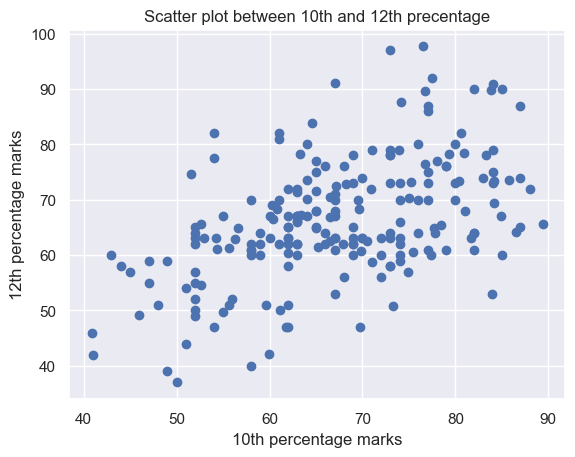

In [ ]:
plt.scatter(df["ssc_p"], df["hsc_p"])
plt.xlabel("10th percentage marks")
plt.ylabel("12th percentage marks")
plt.title("Scatter plot between 10th and 12th precentage")

In [ ]:
colors = {"Placed": "tab:green", "Not Placed": "tab:red"}

In [ ]:
df["status"].map(colors)

sl_no
1      tab:green
2      tab:green
3      tab:green
4        tab:red
5      tab:green
         ...    
211    tab:green
212    tab:green
213    tab:green
214    tab:green
215      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, 'Scatter plot between 10th and 12th precentage')

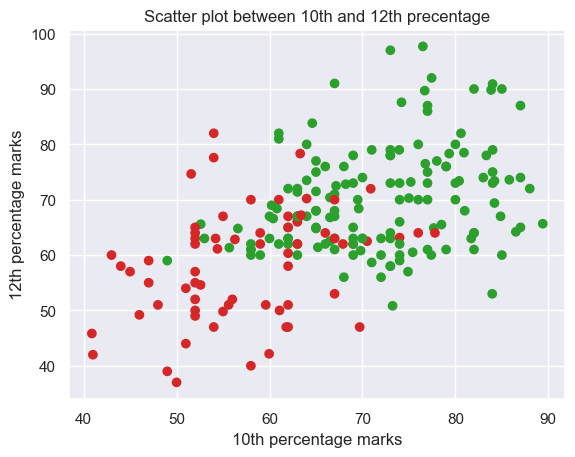

In [ ]:
plt.scatter(df["ssc_p"], df["hsc_p"], c=df["status"].map(colors))
plt.xlabel("10th percentage marks")
plt.ylabel("12th percentage marks")
plt.title("Scatter plot between 10th and 12th precentage")

### Pair Plots
Pair plots help us visualize the pairwise relationships in the dataset.

In [ ]:
sns.pairplot(df)

In [ ]:
sns.pairplot(df, hue="status", diag_kind="hist")

In [ ]:
sns.pairplot(df, hue="status", diag_kind="hist")

In [ ]:
df

In [ ]:
sns.pairplot(df[["ssc_p", "hsc_p", "degree_p"]])

In [ ]:
df

### Box Plots
Box plots are useful for visualizing the distribution of data and detecting outliers.

<Axes: ylabel='ssc_p'>

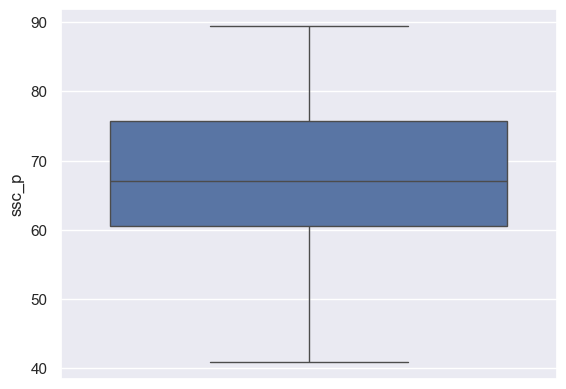

In [ ]:
sns.boxplot(y="ssc_p", data=df)

<Axes: ylabel='hsc_p'>

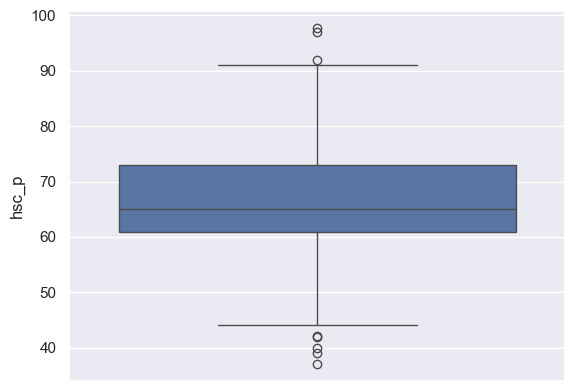

In [ ]:
sns.boxplot(y="hsc_p", data=df)

<Axes: xlabel='status', ylabel='hsc_p'>

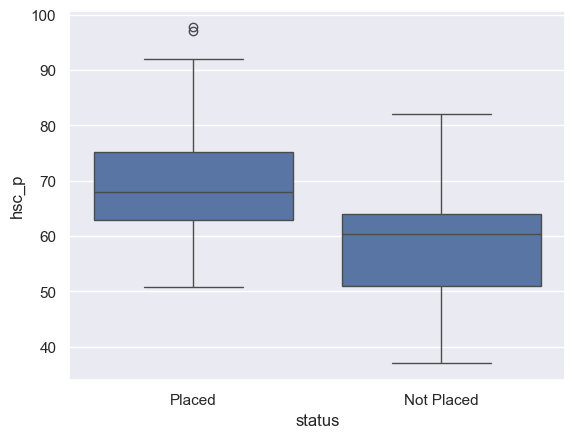

In [ ]:
sns.boxplot(y="hsc_p", data=df, x="status")

### Line Plots
Visualizing trends using line plots.

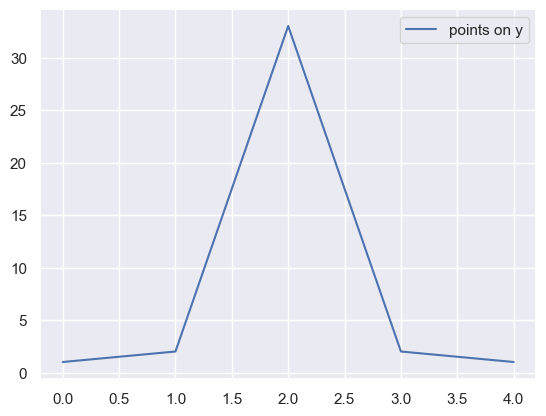

In [ ]:
y = [1, 2, 33, 2, 1]
plt.plot(y, label="points on y")
plt.legend()

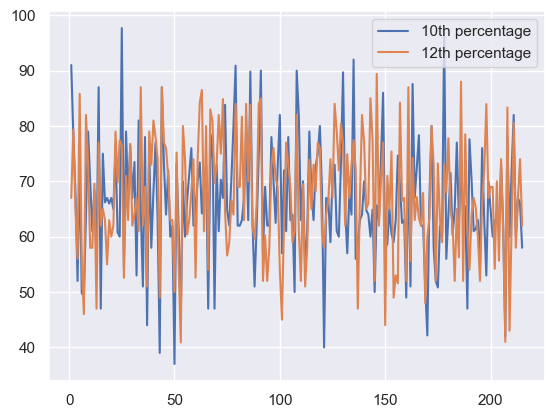

In [ ]:
plt.plot(df["hsc_p"], label="10th percentage")
plt.plot(df["ssc_p"], label="12th percentage")
plt.legend()

In [37]:
df.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


<Axes: >

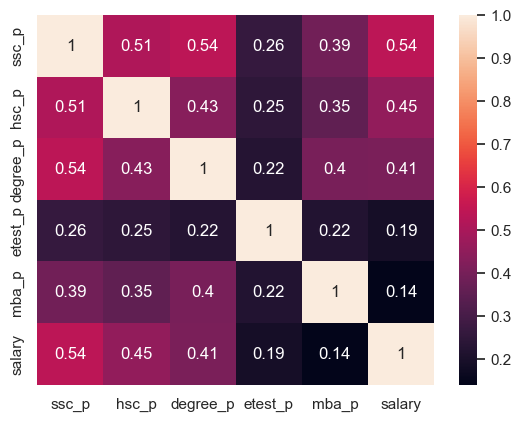

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

(array([67.,  0., 94., 38., 10.,  3.,  1.,  1.,  0.,  1.]),
 array([     0.,  94000., 188000., 282000., 376000., 470000., 564000.,
        658000., 752000., 846000., 940000.]),
 <BarContainer object of 10 artists>)

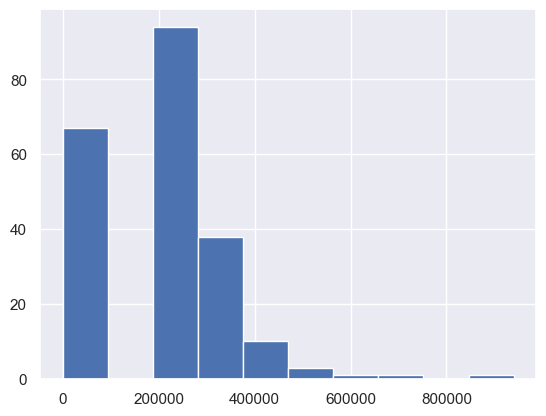

In [ ]:
plt.hist(df["salary"])

<Axes: xlabel='salary', ylabel='Density'>

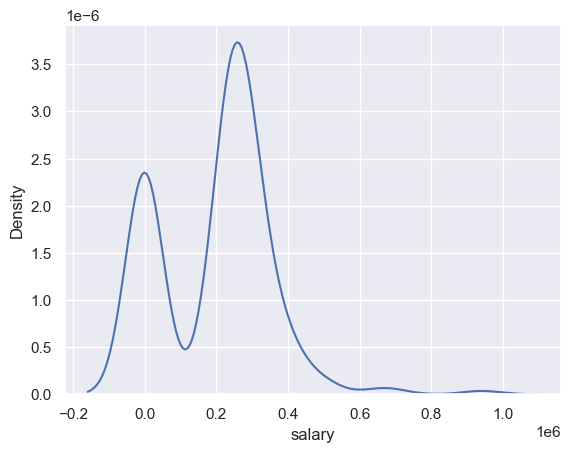

In [ ]:
sns.kdeplot(df["salary"])

## Outlier Analysis

## 5. Model Building
We will prepare the data for training, split it into training and testing sets, and train a Logistic Regression model.

<Axes: ylabel='degree_p'>

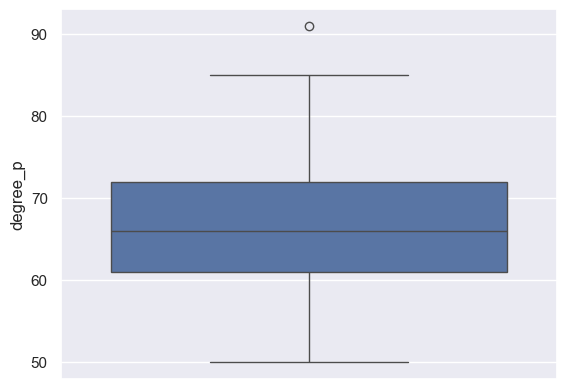

In [ ]:
sns.boxplot(y="degree_p", data=df)

In [ ]:
percentile25 = df["degree_p"].quantile(0.25)

In [ ]:
percentile75 = df["degree_p"].quantile(0.75)
iqr = percentile75 - percentile25
iqr

11.0

In [ ]:
uper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)

In [ ]:
df = df[df["degree_p"] < uper_limit]
df = df[df["degree_p"] > lower_limit]

In [ ]:
col = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]

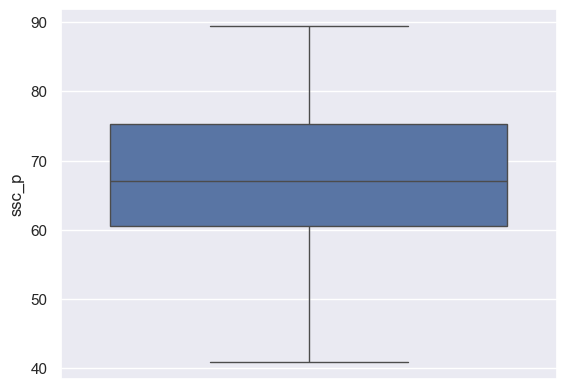

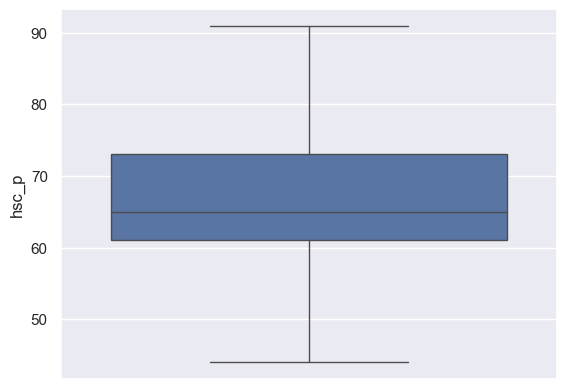

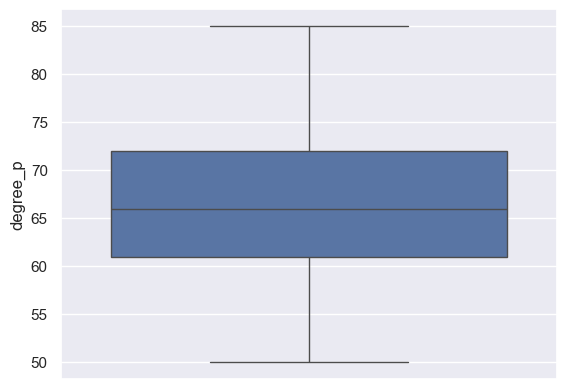

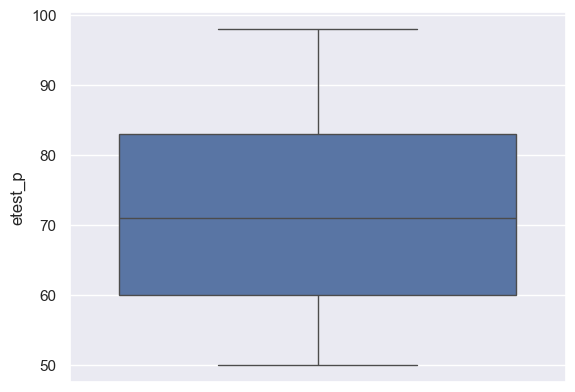

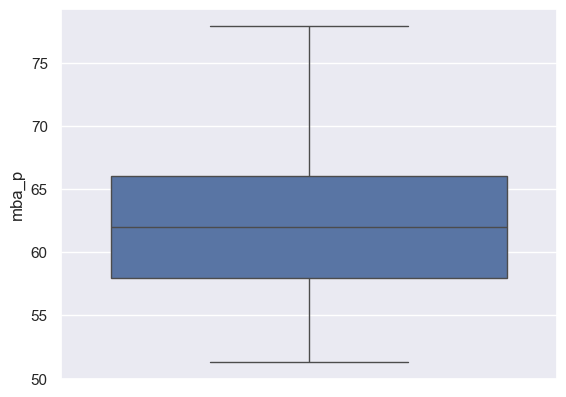

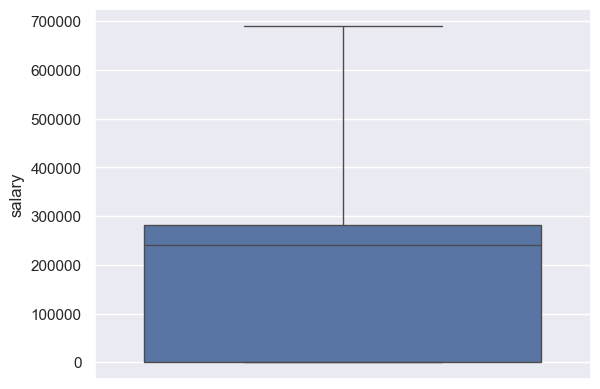

In [ ]:
for c in col:
    percentile25 = df[c].quantile(0.25)
    percentile75 = df[c].quantile(0.75)
    iqr = percentile75 - percentile25
    uper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    df = df[df[c] < uper_limit]
    df = df[df[c] > lower_limit]
    plt.figure()
    sns.boxplot(y=c, data=df)

In [ ]:
for i in col:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    uper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    print("Uper Limit of ", i, "Coloumn : ", uper_limit)
    print("Lower Limit of ", i, "Coloumn : ", lower_limit)

Uper Limit of  ssc_p Coloumn :  97.37500000000003
Lower Limit of  ssc_p Coloumn :  39.17499999999998
Uper Limit of  hsc_p Coloumn :  91.0
Lower Limit of  hsc_p Coloumn :  43.0
Uper Limit of  degree_p Coloumn :  88.5
Lower Limit of  degree_p Coloumn :  44.5
Uper Limit of  etest_p Coloumn :  117.5
Lower Limit of  etest_p Coloumn :  25.5
Uper Limit of  mba_p Coloumn :  78.305
Lower Limit of  mba_p Coloumn :  45.76499999999999
Uper Limit of  salary Coloumn :  703125.0
Lower Limit of  salary Coloumn :  -421875.0


In [62]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


## Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
df["ssc_b"] = le.fit_transform(df["ssc_b"])

In [ ]:
df["ssc_b"]

sl_no
2      0
3      0
4      0
5      0
6      1
      ..
211    1
212    1
213    1
214    1
215    0
Name: ssc_b, Length: 204, dtype: int32

In [ ]:
col = ["gender", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status"]

In [ ]:
for c in col:
    df[c] = le.fit_transform(df[c])

In [75]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
6,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0


In [77]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

## Logestic Regression 

In [ ]:
X = df[
    [
        "gender",
        "ssc_p",
        "ssc_b",
        "hsc_p",
        "hsc_b",
        "hsc_s",
        "degree_p",
        "degree_t",
        "workex",
        "etest_p",
        "specialisation",
        "mba_p",
    ]
].values

In [90]:
X

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
Y = df.iloc[:, -2].values

In [86]:
Y

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0])

In [92]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=45
)

In [96]:
X_train.shape

(142, 12)

In [98]:
X_test.shape

(62, 12)

## Feature Scaling 

In [ ]:
## Feature scaling is used if one column values are more in width then others column and it will dominate in the model /
## just like salary is more in width then hss_b here so we have to bring them in same

## \Two types of feature Scaling 

## 1. Normalization and to convert it has formula of  :- -------                                x-xmin / Xmax-Xmin
## 2. Standardization and to convert it has formula of  :-------                    x-mean of column / standard division of column

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.fit_transform(X_test)

In [106]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()

In [110]:
reg.fit(X_train, Y_train)

LogisticRegression()

In [112]:
reg.coef_

array([[ 0.42638839,  1.80065454,  0.15266056,  0.30044615,  0.05564488,
         0.03376707,  0.89861344, -0.28176309,  0.8025317 , -0.22923267,
        -0.27593153, -0.82647474]])

In [ ]:
Y_pred = reg.predict(X_test)

In [116]:
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [118]:
Y_test

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

## Create Confusion metrix and draw a heat map 

In [120]:
from sklearn.metrics import confusion_matrix

In [122]:
confusion_matrix(Y_test, Y_pred)

array([[16,  3],
       [ 1, 42]], dtype=int64)

## how to check True positive, True Negative, False Negative, True Positive values 

In [124]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

In [ ]:
print(
    "Value of True Negative =",
    tn,
)
print(
    "Value of False Positive = ",
    fp,
)
print(
    "Value of False Negative = ",
    fn,
)
print("Value of Ture Positve = ", tp)

Value of True Negative = 16
Value of False Positive =  3
Value of False Negative =  1
Value of Ture Positve =  42


## Now make heatmap to show how much it is predicted 

<Axes: >

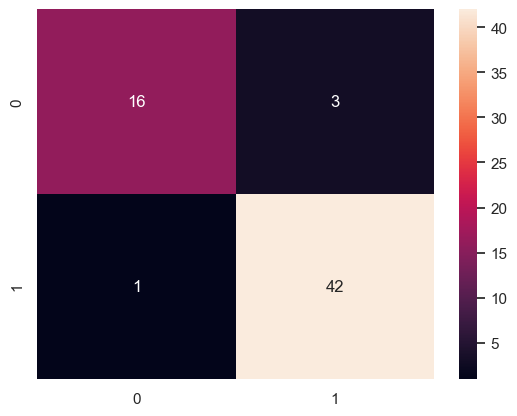

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

## Find out the accuracy metrix

In [130]:
from sklearn.metrics import accuracy_score

In [180]:
(42 + 16) / 62

0.9354838709677419

In [178]:
accuracy_score(Y_test, Y_pred)

0.9354838709677419

## Find out the AUR-ROC Evaluation Metrix score

In [134]:
from sklearn.metrics import roc_auc_score

In [136]:
roc_auc_score(Y_test, Y_pred)

0.9094247246022031

## Find out number of 0 classes in Y_test

In [ ]:
print(sum(Y_test == 0))

19


## Find out number of 1 classes in Y_test

In [ ]:
print(sum(Y_test == 1))

43


## Find out the recall and precision metrix

In [ ]:
Precision = tp / (tp + fp)

In [ ]:
(tp + fp)

45

In [ ]:
Recall = tp / (tp + fn)

In [156]:
Recall

0.9767441860465116

## Find out the recall and precision metrix

In [158]:
F_Score = (2 * Precision * Recall) / (Precision + Recall)

In [160]:
F_Score

0.9545454545454545

## Create the classification report and understand each term in it 

In [162]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.93      0.98      0.95        43

    accuracy                           0.94        62
   macro avg       0.94      0.91      0.92        62
weighted avg       0.94      0.94      0.93        62



In [166]:
import joblib
import numpy as np

In [ ]:
Y_prediction = []
for i in range(X_test.shape[0]):
    new_X_data = X_test[i, 0:]
    joblib.dump(reg, "logistic_regression_model.pkl")
    # # Load new data
    new_data = new_X_data.reshape(1, -1)

    # Load the saved logistic regression model
    log_reg_model = joblib.load("logistic_regression_model.pkl")

    # Make predictions
    predictions = log_reg_model.predict(new_data)

    if predictions == 1:
        Y_prediction.append("Placed")
    else:
        Y_prediction.append("Not Placed")

In [170]:
Y_Actual = []
for i in range(Y_test.shape[0]):
    if Y_test[i] == 1:
        Y_Actual.append("Placed")
    else:
        Y_Actual.append("Not Placed")

In [ ]:
A = pd.Series(Y_Actual)
B = pd.Series(Y_prediction)

pd.concat([A, B], axis=1).rename(columns={0: "Y_actual", 1: "Y_prediction"}).head(50)

,Y_actual,Y_prediction
0,Placed,Placed
1,Not Placed,Placed
2,Placed,Placed
3,Placed,Placed
4,Placed,Placed
5,Not Placed,Not Placed
6,Placed,Placed
7,Not Placed,Not Placed
8,Placed,Placed
9,Placed,Placed


In [ ]:
# new_X_data = X_test[15,0:]

In [ ]:
joblib.dump(reg, "logistic_regression_model.pkl")
# # Load new data
new_data = new_X_data.reshape(1, -1)

# Load the saved logistic regression model
log_reg_model = joblib.load("logistic_regression_model.pkl")

# Make predictions
predictions = log_reg_model.predict(new_data)

if predictions == 1:
    print("Placed")
else:
    print("Not Placed")

Placed


In [176]:
Y_Actual

['Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Not Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Not Placed',
 'Placed',
 'Placed',
 'Not Placed',
 'Placed']